# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [45]:
import cv2
from sklearn.preprocessing import LabelBinarizer
import tensorflow as tf
from sklearn.utils import resample
from sklearn.utils import shuffle
from tensorflow.contrib.layers import flatten
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline
import pandas as pd
import numpy as np

In [113]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = './traffic-signs-data/train.p'
testing_file = './traffic-signs-data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 2D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below.

In [29]:
### Replace each question mark with the appropriate value.

# TODO: Number of training examples
n_train = X_train.shape[0]

# TODO: Number of testing examples.
n_test = X_test.shape[0]

# TODO: What's the shape of an traffic sign image? 
image_shape = (train['features'].shape[1],train['features'].shape[2],train['features'].shape[3]) # width, height, channels

# TODO: How many unique classes/labels there are in the dataset.
n_classes = np.unique(train['labels']).size

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 39209
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

In [ ]:
### Data exploration visualization goes here.
### Feel free to use as many code cells as needed.

/home/carnd/anaconda3/envs/carnd-term1/lib/python3.5/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


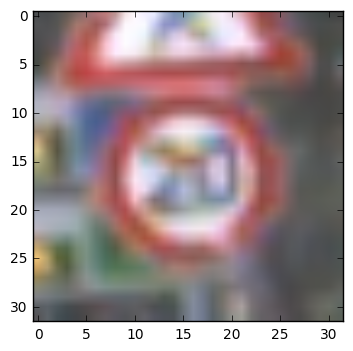

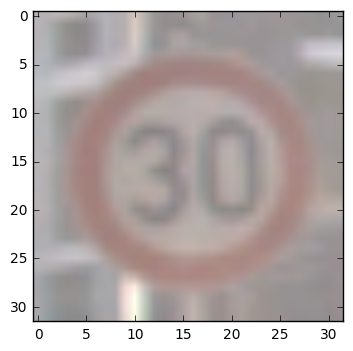

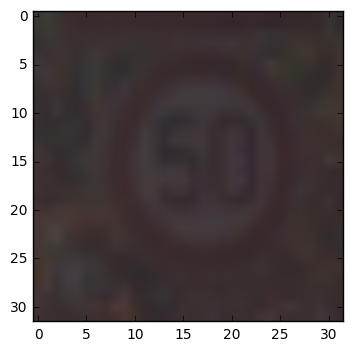

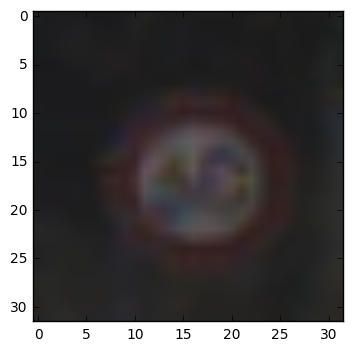

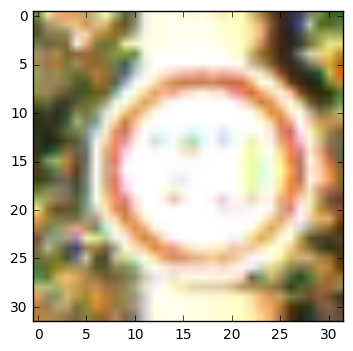

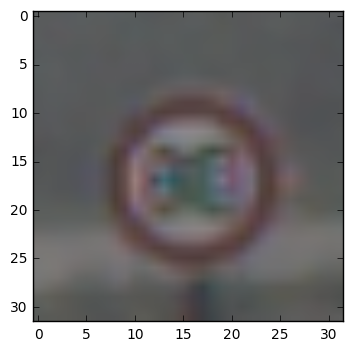

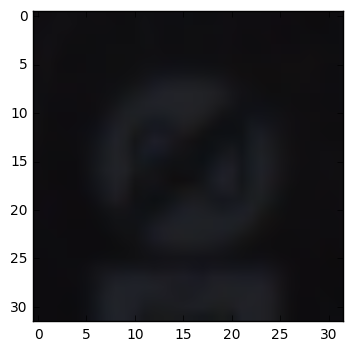

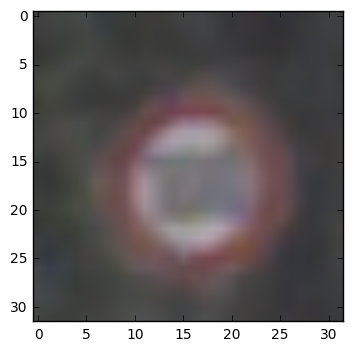

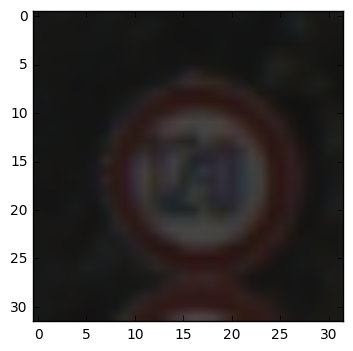

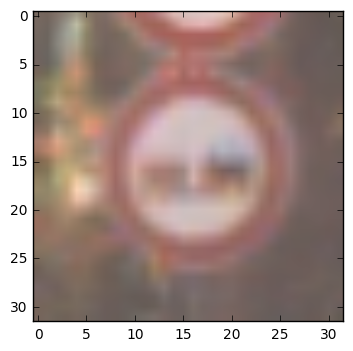

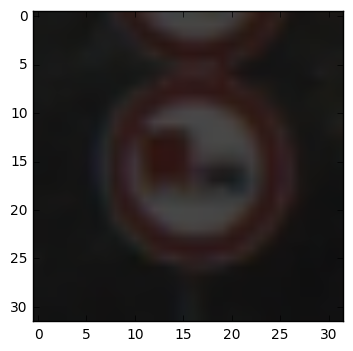

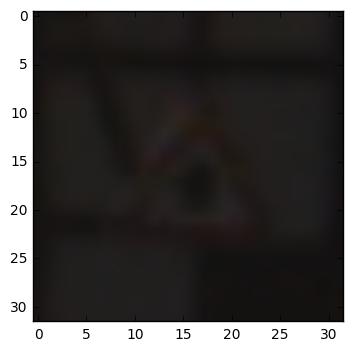

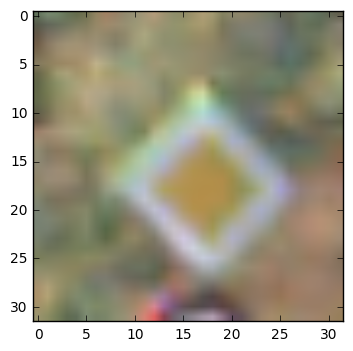

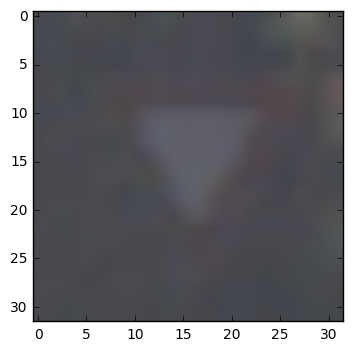

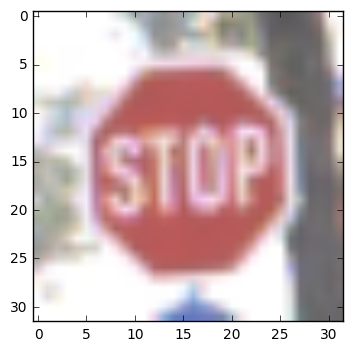

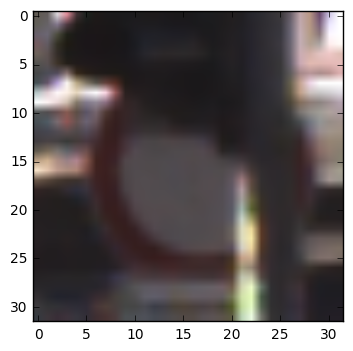

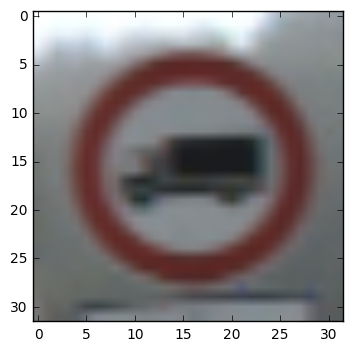

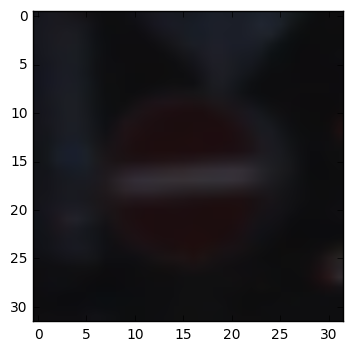

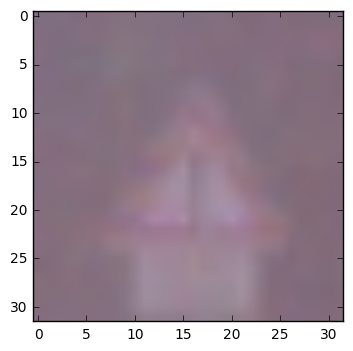

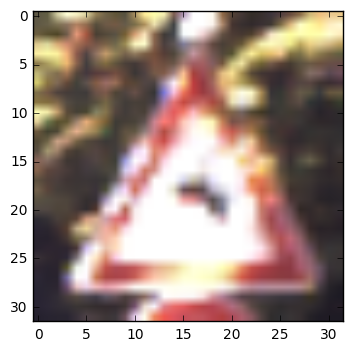

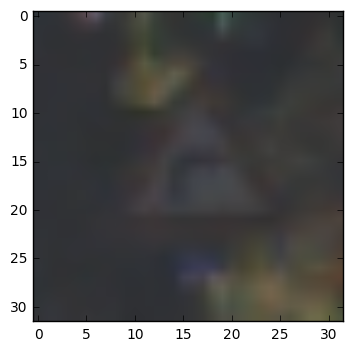

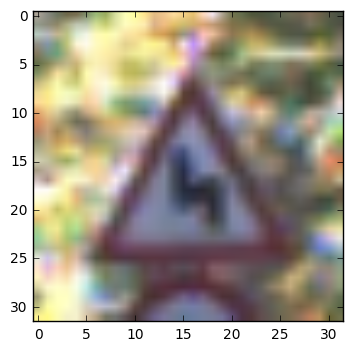

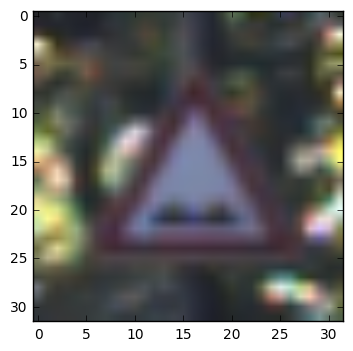

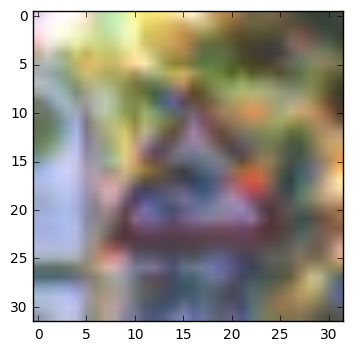

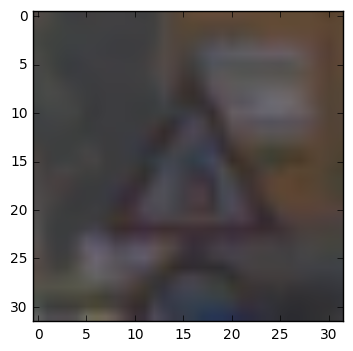

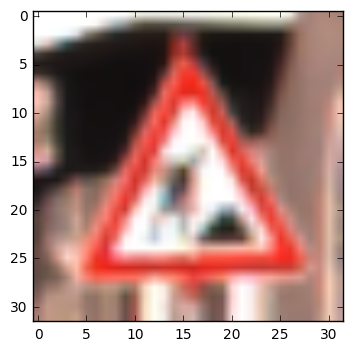

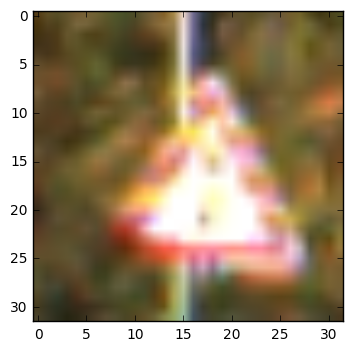

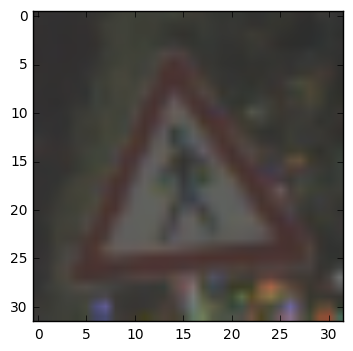

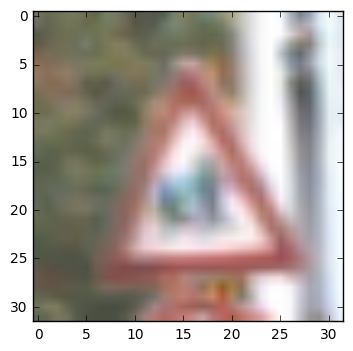

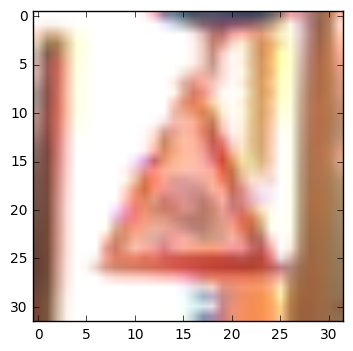

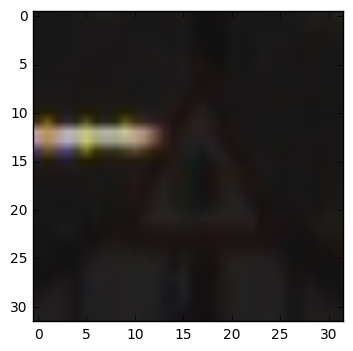

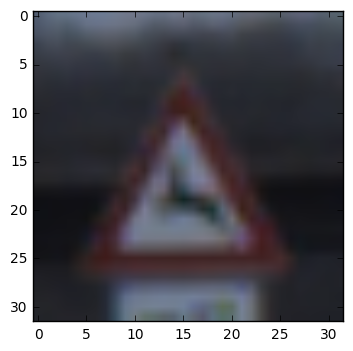

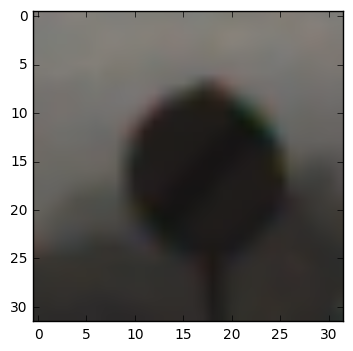

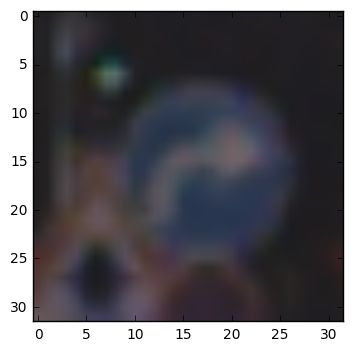

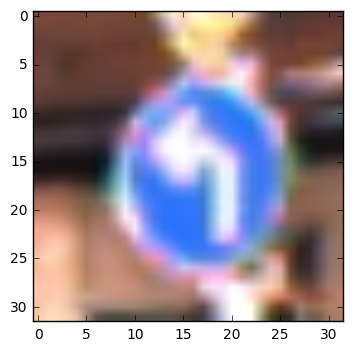

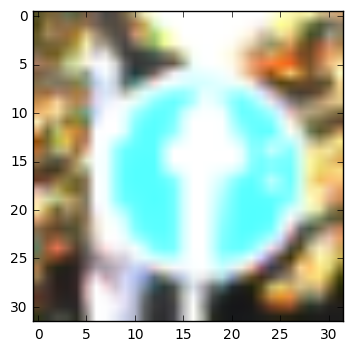

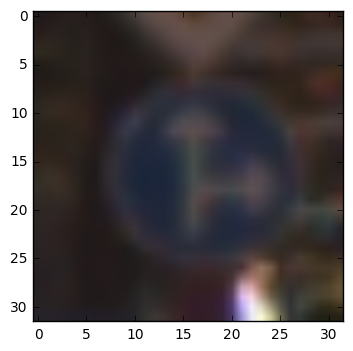

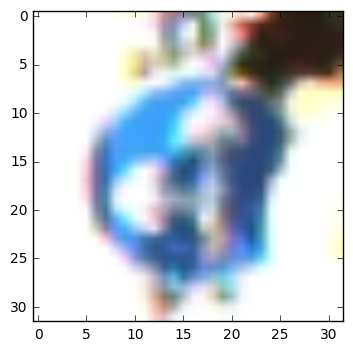

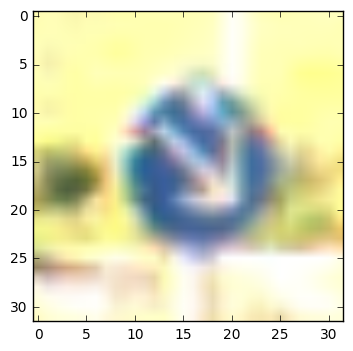

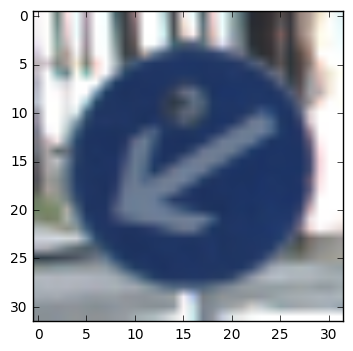

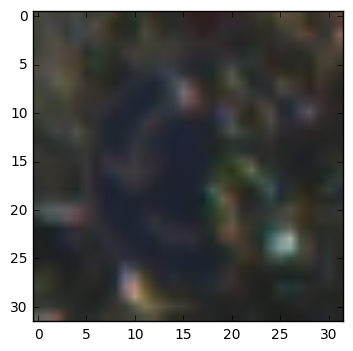

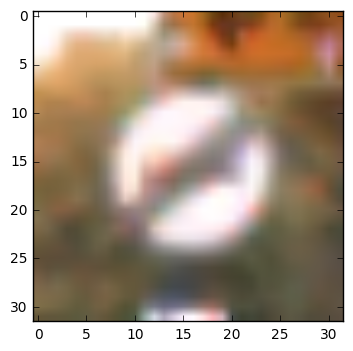

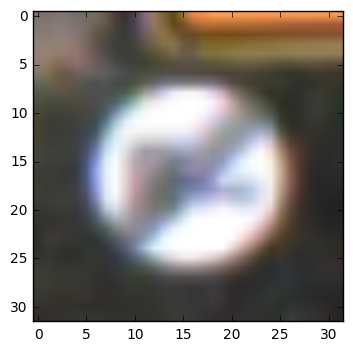

In [114]:
signExamples = {0:0,1:210,2:2430,3:4680,4:6090,
                5:8070,6:9930,7:10350,8:11790,9:13200,
                10:14670,11:16680,12:18000,13:20100,
                14:22260,15:23040,16:23670,17:24090,18:25200,
                19:26400,20:26610,21:26970,22:27300,23:27690,24:28200,
                25:28470,26:29970,27:30570,28:30810,29:31350,30:31620,31:32070,
                32:32850,33:33090,34:33779,35:34199,36:35399,37:35789,38:35999,39:38069,40:38369,41:38729,42:38969}

for i in signExamples.keys():
    plt.figure()
    plt.imshow(X_train[signExamples[i]])

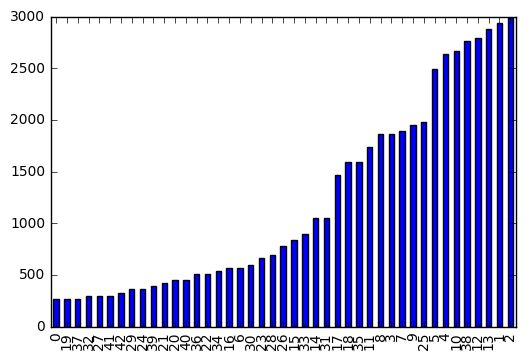

In [4]:
# frequency distribution for each type of sign
allTrain = np.concatenate((y_test,y_train),axis=0)
signs = pd.DataFrame(allTrain)
frequency = signs[0].value_counts().sort_values()
frequency.plot(kind='bar')
labelCounts = frequency.to_dict()

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [ ]:
### Preprocess the data here.
### Feel free to use as many code cells as needed.

In [5]:
# convert the image to greyscale by averaging each channel
def avgRGBValues(img):
    return np.sum(img,-1)/3

# https://samarthbhargav.wordpress.com/2014/05/05/image-processing-with-python-rgb-to-grayscale-conversion/
#http://stackoverflow.com/questions/12201577/how-can-i-convert-an-rgb-image-into-grayscale-in-python
def grayScaleConvert(img):
    # weighted average for grayscale conversion instead of simple mean
    weights =[.2989,.5870,.1140]
    return np.dot(img[...,:3],weights)

# perform greyscale normalization
# min max scalling algorithm described in the tensorflow class and implemented in lab
def normalizeGrey(img):
    a = 0 # lower norm value
    b = 1 # upper norm value
    
    minGrey = 0
    maxGrey = 255
    return a + ( ( (img - minGrey)*(b - a) )/( maxGrey - minGrey ) )

In [ ]:
# convert the images to grayscale
greyTrain = np.apply_along_axis(grayScaleConvert,-1,X_train)
greyTest =  np.apply_along_axis(grayScaleConvert,-1,X_test)

In [ ]:
# save the grey images to a a file
# only run below after converting to grayscale
#np.save("greyTrain",greyTrain)
#np.save("greyTest",greyTest)

In [98]:
# load previously processed greyscale images
greyTest = np.load("greyTest.npy")
greyTrain = np.load("greyTrain.npy")

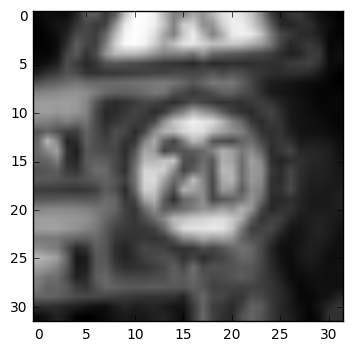

In [7]:
# visualize and validate the conversion
plt.imshow(greyTrain[1],cmap=plt.get_cmap('gray'))

In [99]:
# normalize the images and reshape
greyTrain = normalizeGrey(greyTrain)
greyTest = normalizeGrey(greyTest)
# reshape the images to 32x32x1
greyTest = np.reshape(greyTest,(len(greyTest),32,32,1))
greyTrain = np.reshape(greyTrain,(len(greyTrain),32,32,1))

### Question 1 

_Describe how you preprocessed the data. Why did you choose that technique?_

**Answer:**

I first applied a grayscale conversion to the images to reduce them to a single channel. Because the meaning of the sign is mostly driven by the shape and content, I thought that the model would be easier to train as a grayscale image instead of rgb. I did not think that color would carry much information since the color typically drives the general purpose rather than the specific meaning (e.g. information, warning, restriction, etc.).

After converting to grayscale, I normalized the data using the min max scalling technique in order to decrease the magnitude of the feature space. Per lectures, this will help provide some stability when operating on large values when applying weights and bias to the feauters. The normalization conditions the feature space by brining the mean values close to 0. The intent was to assist the optimizer when training the model and identifying appropriate weights.

In [ ]:
### Generate data additional data (OPTIONAL!)
### and split the data into training/validation/testing sets here.
### Feel free to use as many code cells as needed.

In [33]:
# data generation
# jitter function source -> https://nbviewer.jupyter.org/github/vxy10/SCND_notebooks/blob/master/preprocessing_stuff/img_transform_NB.ipynb
def jitter_image(img,ang_range,shear_range,trans_range):

    ang_rot = np.random.uniform(ang_range)-ang_range/2
    rows,cols,ch = img.shape    
    Rot_M = cv2.getRotationMatrix2D((cols/2,rows/2),ang_rot,1)

    # Translation
    tr_x = trans_range*np.random.uniform()-trans_range/2
    tr_y = trans_range*np.random.uniform()-trans_range/2
    Trans_M = np.float32([[1,0,tr_x],[0,1,tr_y]])

    # Shear
    pts1 = np.float32([[5,5],[20,5],[5,20]])

    pt1 = 5+shear_range*np.random.uniform()-shear_range/2
    pt2 = 20+shear_range*np.random.uniform()-shear_range/2

    pts2 = np.float32([[pt1,5],[pt2,pt1],[5,pt2]])

    shear_M = cv2.getAffineTransform(pts1,pts2)
        
    img = cv2.warpAffine(img,Rot_M,(cols,rows))
    img = cv2.warpAffine(img,Trans_M,(cols,rows))
    img = cv2.warpAffine(img,shear_M,(cols,rows))
    
    return img

In [88]:
# concate the train and test data
fullData_x = np.concatenate((greyTrain,greyTest),axis=0)
fullData_y = np.concatenate((y_train,y_test),axis=0)
fullData_x.shape

(51839, 32, 32, 1)

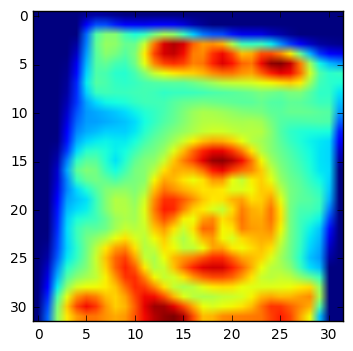

In [51]:
# jitter the images
newIMG = jitter_image(fullData_x[30],20,10,5)
newIMG = np.reshape(newIMG,(32,32))
plt.imshow(newIMG)

In [14]:
# loop through each image class and generate a new sample of images
newImages = []
newLables = np.array([])
count = 0
for i in range(0,fullData_x.shape[0]):
    currLabel = fullData_y[i]
    # jitter 5 images
    for x in range(0,3):
        newIMG = jitter_image(fullData_x[i],20,10,5)
        newImages.append(newIMG) 
        newLables = np.append(newLables,currLabel)
        
    count+=1
newImages = np.array(newImages)

In [17]:
# save the new images and lables 
# only run after image generations
#np.save("jitterImages",newImages)
#np.save("jitterLabels",newLables)

In [101]:
# load the new images and labels
# load previously generated images
newImages = np.load("jitterImages.npy")
newLabels = np.load("jitterLabels.npy")

# reshape the images
newImages = np.reshape(newImages,(len(newImages),32,32,1))

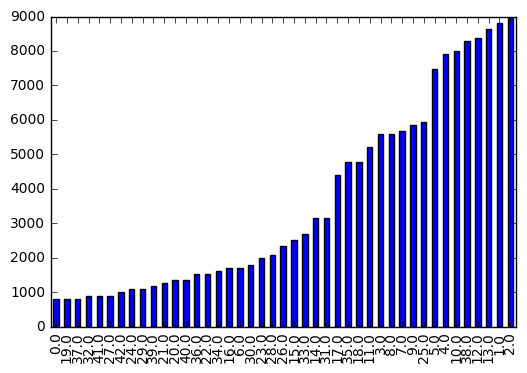

In [53]:
#  analyze new image distribution
# frequency distribution for each type of sign
signs = pd.DataFrame(newLabels)
frequency = signs[0].value_counts().sort_values()
frequency.plot(kind='bar')

In [102]:
# combine original and generated data sets
fullData_x = np.concatenate((fullData_x,newImages),axis=0)
fullData_y = np.concatenate((fullData_y,newLabels),axis=0)

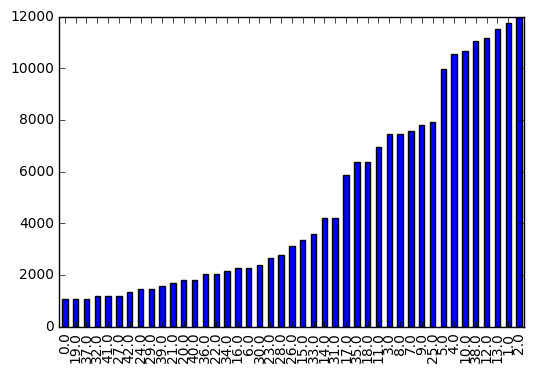

In [55]:
# visualize the fully concatenated data set
# frequency distribution for each type of sign
signs = pd.DataFrame(fullData_y)
frequency = signs[0].value_counts().sort_values()
frequency.plot(kind='bar')

In [103]:
# split the data into train (70%), test(15%), and holdout validation(15%)
from sklearn.cross_validation import train_test_split
fullData_x, fullData_y = shuffle(fullData_x,fullData_y)
testSize = .3
valSize = .5
x_train, x_test, y_train, y_test = train_test_split(fullData_x, fullData_y, test_size=testSize)
x_test, x_val, y_test, y_val = train_test_split(x_test, y_test, test_size=valSize)

### Question 2

_Describe how you set up the training, validation and testing data for your model. **Optional**: If you generated additional data, how did you generate the data? Why did you generate the data? What are the differences in the new dataset (with generated data) from the original dataset?_

**Answer:**

The data was split into training, validation and testing sets. 70% of the data was used for training while 15% were used for validation and 15% for testing. The testing data set is used as a hold out to validate the final model. All data from the the pickle was combined into a concatenated features and label set and shuffled before performing the split.

I also generate additional data using an image jittering technique that was described in the paper. I reused a piece of code that was referenced on the forum and can be found in the link below. This function applies a transformation where the image is tilted and shifted randomly per a distribution. I generated the extra data to address 2 potential challenges. The samples were now evenly distributed across classes and I was concerned that position and angle of the signs would impact application of the model to images that were not cropped and taken at the same angles as the training images.

* https://nbviewer.jupyter.org/github/vxy10/SCND_notebooks/blob/master/preprocessing_stuff/img_transform_NB.ipynb

I analyzed the distribution of images by class and determined how many images of each class were needed to make the distribution uniform. Once this was known, I grabbed sample images and applied the jitter function to create a new set of images for each class so that they have the same number of examples.

The new data set now contains 43 classes with the same number of examples each. The train, validation, and test split were applied on this data.

In [ ]:
### Define your architecture here.
### Feel free to use as many code cells as needed.

In [90]:
def signNet(x):
    # layer depth
    filter_depth = {
        'layer_1':6,
        'layer_2':16,
        'layer_3':120,
        'layer_4':43
    }
    
    mu = 0
    sigma = .1
    dropout = .75
    
    # layer 1 convolution layer (input: 32x32x1, output:28x28x6)
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 1, filter_depth['layer_1']), mean = mu, stddev = sigma),name="conv1_w")
    conv1_b = tf.Variable(tf.zeros(filter_depth['layer_1']),name="conv1_b")
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b
    # layer 1 activation
    conv1 = tf.nn.relu(conv1)
    # layer 1 pooling (input: 28x28x6, output :14x14x6)
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    
    
    # layer 2 convolution layer (input: 14x14x6, output:10x10x16
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, filter_depth['layer_1'], filter_depth['layer_2']), mean = mu, stddev = sigma),name="conv2_w")
    conv2_b = tf.Variable(tf.zeros(filter_depth['layer_2']),name="conv2_b")
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    # layer 2 activation
    conv2 = tf.nn.relu(conv2)
    # layer 2 pooling (input: 10x10x16, output:5x5x16)
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    
    # flatten the output for the fully connected layers (input:5x5x16, output: 400)
    flat = flatten(conv2)
    
    # layer 3 fully connected (input: 400, output : 120)
    full_1_W = tf.Variable(tf.truncated_normal(shape=(400, filter_depth['layer_3']), mean = mu, stddev = sigma),name="full_1_w")
    full_1_b = tf.Variable(tf.zeros(filter_depth['layer_3']),name="full_1_b")
    full_1   = tf.matmul(flat, full_1_W) + full_1_b
    
    # layer 3 activation
    full_1 = tf.nn.relu(full_1)
    #full_1 = tf.nn.dropout(full_1, dropout)
    
    # layer 4 fully connected for final logits (input: 120, output:43)
    full_2_W = tf.Variable(tf.truncated_normal(shape=(120, filter_depth['layer_4']), mean = mu, stddev = sigma),name="full_2_w")
    full_2_b = tf.Variable(tf.zeros(filter_depth['layer_4']),name="full_2_b")
    logits = tf.matmul(full_1, full_2_W) + full_2_b
    
    return logits

### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


**Answer:**

The model is a feedforward network that is comprised of 2 feature or convolutional layers and 2 fully connected layers. 

The first convo layer has a filter depth of 6 and it accepts an input that is 32x32x1 and produces and output that is 28x28x6. The convo layer is followed by a relu activation and pooling function with a kernal and stride of 2 that creates an output of 14x14x6.

The second convolution layer has a depth of 16, producing an output matrix of 10x10x16. It is also followed by relu activation function and pooling step with a kernal and stride of 2 that transforms the output to 5x5x16. 

After the second convoultion layer, the model is flatten into a fully connected layer that has 120 features. This is connected to a second layer with 43 classes to calculate the logits.

The model architecture uses a successful design described in the paper as well as model configuration (i.e convo depth, strides, and connected layer features) that were used in the the lenet-5 model. 

I experimented with the number of nodes in the hidden layer as well as the number of fully connected layers before settling on the current structure.

All weights and biases are defined to be initalized with a mean of 0 and a variance of .1.

Sources for model design:
* https://ujjwalkarn.me/2016/08/11/intuitive-explanation-convnets/
* http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf

In [ ]:
### Train your model here.
### Feel free to use as many code cells as needed.

In [104]:
tf.reset_default_graph()
# placeholders for inputs and labels
features = tf.placeholder(tf.float32, (None, 32, 32, 1),name="features")
labels = tf.placeholder(tf.int32, (None))
one_hot_label = tf.one_hot(labels, n_classes)

# hyperparams
rate = 0.05
trainingEpochs = 90
batchSize = 200

# training pipeline
logits = signNet(features)
entropy_measure = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_label)
loss_measure= tf.reduce_mean(entropy_measure)
optimizer = tf.train.GradientDescentOptimizer(learning_rate = rate)
training = optimizer.minimize(loss_measure)

correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_label, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [92]:
# function from lenet lab that will evaluate the model accuracy given the validation and training data
def evaluate_model(X_data, Y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, batchSize):
        batch_x, batch_y = X_data[offset:offset+batchSize], Y_data[offset:offset+batchSize]
        accuracy = sess.run(accuracy_operation, feed_dict={features: batch_x, labels: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

In [105]:
accuracy= []
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())

    running_validation_accuracy = 0
    # loop through each cv fold

    num_examples = len(x_train)
    print("Training...")
    for i in range(trainingEpochs):
        X_train, Y_train = shuffle(x_train, y_train)
        for offset in range(0, num_examples, batchSize):
            end = offset + batchSize
            batch_x, batch_y = X_train[offset:end], Y_train[offset:end]
            sess.run(training, feed_dict={features: batch_x, labels: batch_y})

        validation_accuracy = evaluate_model(x_test, y_test)
        accuracy.append(validation_accuracy)

    #print("EPOCH {} ...".format(i+1))
    print("Validation Accuracy = {:.3f}".format(validation_accuracy))
    #print()
    saver = tf.train.Saver()
    saver.save(sess, 'signNet_wImageGen')
    print("Model saved")

Training...
Validation Accuracy = 0.879
Model saved


0.97235079250708534

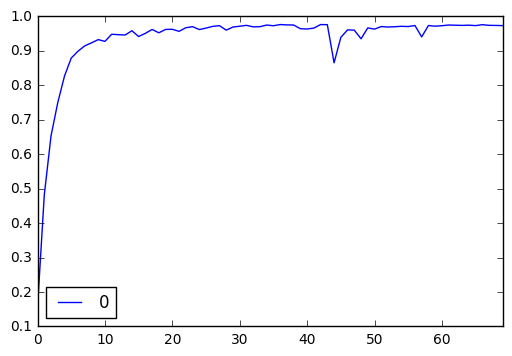

In [94]:
acc_df = pd.DataFrame(accuracy)
acc_df.plot(kind="line")
accuracy[-1]

0.87933640582873551

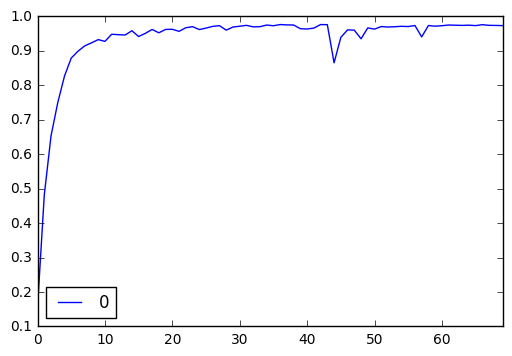

In [106]:
acc_df_withJitter = pd.DataFrame(accuracy)
acc_df.plot(kind="line")
accuracy[-1]

In [107]:
# evalute the model on a test data set that has been withheld
with tf.Session() as sess:
    loader = tf.train.import_meta_graph('signNet.meta')
    loader.restore(sess, tf.train.latest_checkpoint('./'))
    test_accuracy = evaluate_model(x_val, y_val)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

Test Accuracy = 0.880


### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_


**Answer:**

The model was trainined using the gradient descent optimizer. A batch size of 200 was selected for mini batching. The batch size is small enough to fit the data into memory for training.  The model contains 3 hyperparameters that were used for training. These include the mu and sigma for weight intialization that were set to achieve a mean of 0 and variance of .1 as well as the learning rate that was set to .05. Finally,The moddel was trainied for 70 epochs as the accuracy did not appear to improve beyond this number of epochs and the hold out sample accuracy appeared to decrease as additional training iterations were used.

During training, the model produces an accuracy of .972 and during the final validation, it produces and accuracy of .972


Based on the performance of the model on unseen data, I tried to generate additional data to attempt to create a model that is able to generalize better. I used this model for step 3. This model produced a lower overall accuracty with training accuracy at 87.9% while testing validation is 88%. However, this model appears to perform better on the more challenging signs that I used. It doesn't get them all correct, but the composition of recommended categories (top 5 of softmax) appear to be better aligned with the actual purpose of the sign.

### Question 5


_What approach did you take in coming up with a solution to this problem? It may have been a process of trial and error, in which case, outline the steps you took to get to the final solution and why you chose those steps. Perhaps your solution involved an already well known implementation or architecture. In this case, discuss why you think this is suitable for the current problem._

**Answer:**

I began the exercise by reading the recommended paper on a prior model used to detect traffic signs. This model found that 2 feature layers and a fully connected layer performed best at this task. My code base started with the lenet5 model from the labs and I modified to reflect model in the paper. While the paper used 3 color channels for features, I chose to use only a grayscale channel for the sake of simplicity. I felt that grayscale was sufficient for determining the purpose of a sign given that the sign's content and shape contain some of the most informative information and that sign colors are typically reserved to inform the driver about what type of information the sign contains (e.g. caution, informative, restrictions, etc.)

I evaluated different model structures (i.e. number of filters and hidden layer connections) by comparing all structural chainges to a a baseline trained model and targeting a .5% or greater change in accuracy. The baseline models structure is based on the lenet5 filter numbers at each convolution layer and connections within the fully connected layer.

After evaluating the model on new signs, I decided to generate a new sample data set from the existing set to see if I could train a model that generalized better. This approach produced a lower overall accuracy, but it was able to accomodate the unseen signs. I used an image jittering technique that shifted the images and I believe that it helped improve the models ability to recognize sign images that were distorted due to resizing. 

I tuned the model through several evaluation setps looking at the model accuracy under different learning rates and training iterations. My objective was to identify a learning rate/epoch combination that improved the accuracy of the model and did not appear to overfit and produce a lower accuracy on the holdout sample. 

I also attempted to regularlize the model by adding a dropout layer between final fully connected layer and logits. I was concerned that the model was offerfitting. I added the dropout layer and compared the results the my best model. The dropout layer produced a -3% change in accuracy during both the training and test against the holdout sample. 

I believe that the lenet model model performs well for this activity because the root of the problem is an image detection and classification issue. The more shallow version that I have chosen peforms well becauase signs have less complex shapes whose feautures can be learned with only a few convolutional layers.

---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [ ]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.

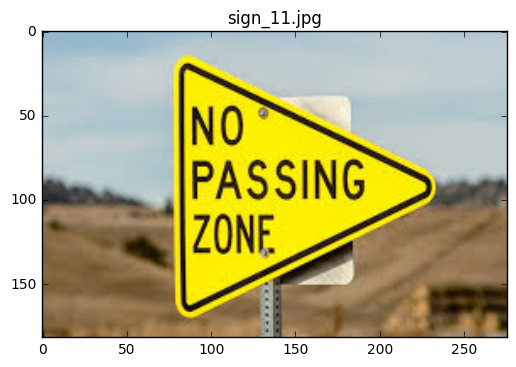

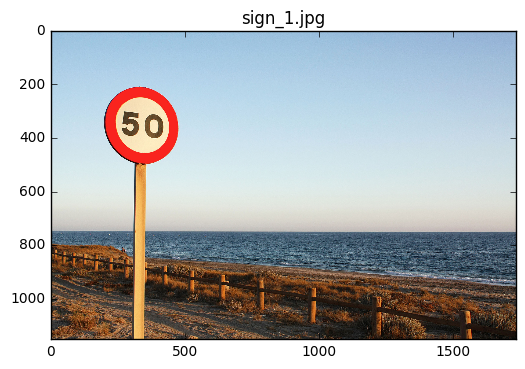

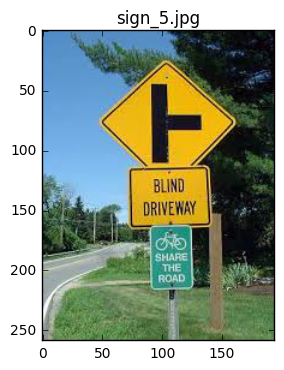

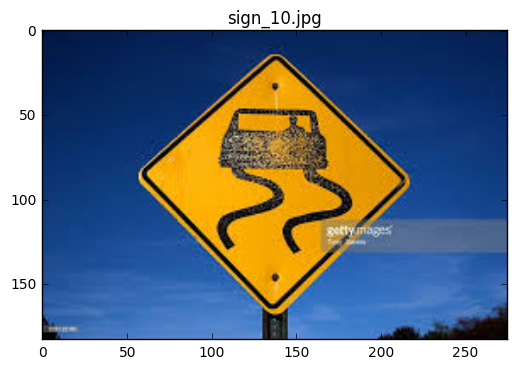

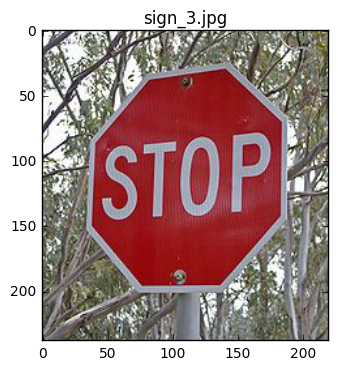

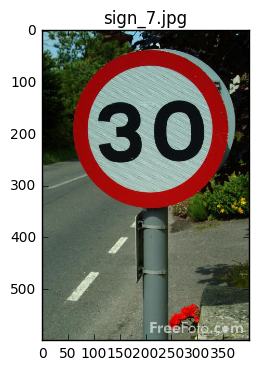

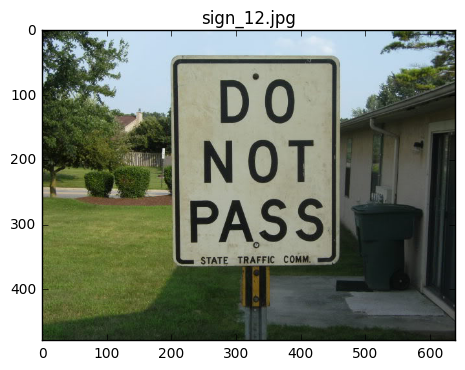

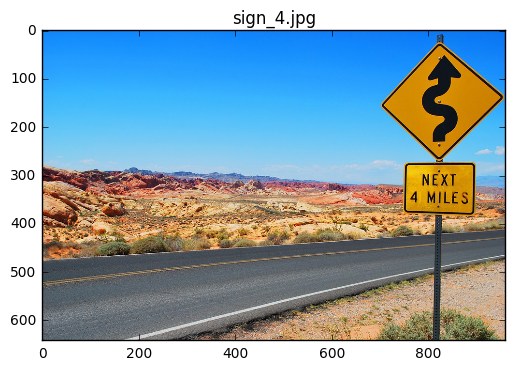

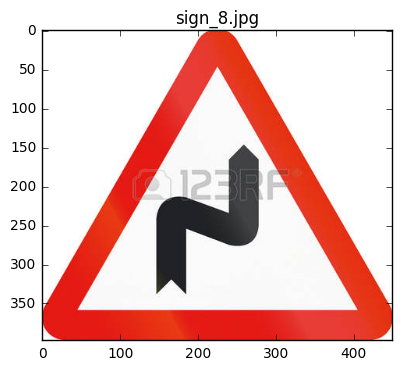

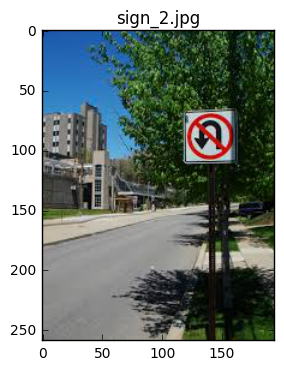

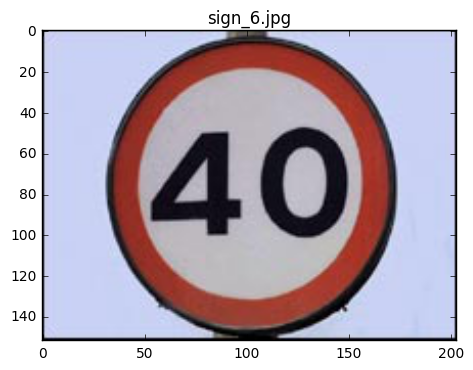

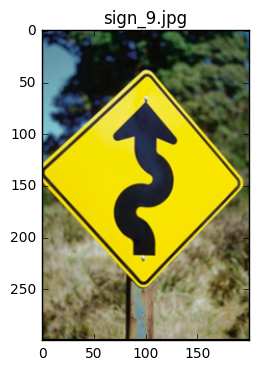

In [61]:
import os
from scipy import misc
newSigns = os.listdir("./newSigns")

for i in newSigns:
    plt.figure()
    plt.title(i)
    plt.imshow(misc.imread("./newSigns/"+i))

### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It could be helpful to plot the images in the notebook._



### **Answer:**

The images below each represent a sign that provides a particular challenge or advantage to the model:

* EU Speed Limit: This is a sign that the model should be able to classify, but the image is not sized appropriately. When resized, the image is distorted and presents a challenge to the classifier. In addition, the image contains a lot of background noise. 
* Multiple Signs: The model is unable to accomodate an image that has multiple signs. This seems to confuse the classifier. However, the other returned classes do somewhat align with the multiple signs that are shown.
* Stop Sign: The classic stop sign image correclty captures the image and is the correct size without creating a lot distortion through resizing. 
* Do Not Pass: The do not pass sign is not exactly like a sign that the classifer has seen before, but it is able to correctly classify it as a no passing sign given the text
* 30 Speed LImit Sign: This image is stretched and contains other content, but it is able to correctly classify the image as a 30KMPH speed sign

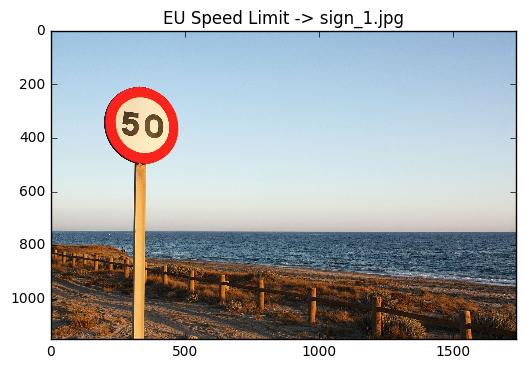

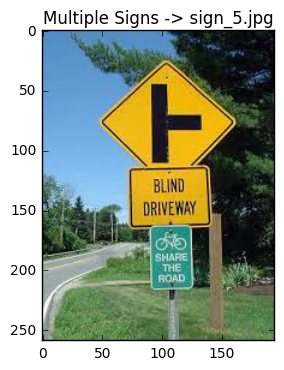

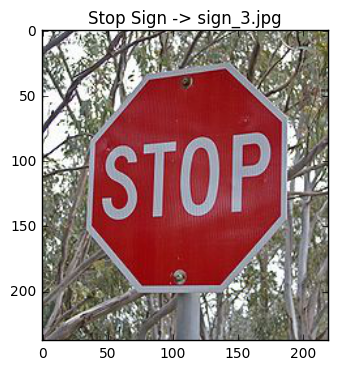

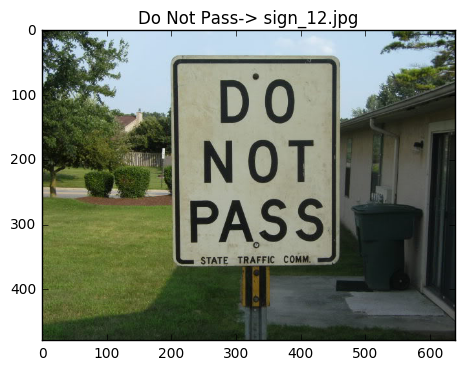

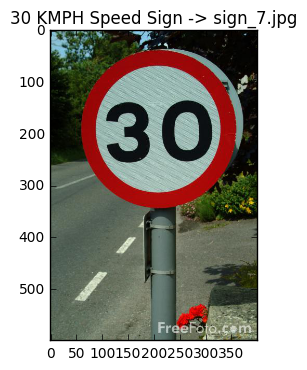

In [108]:
plt.figure()
plt.title("EU Speed Limit -> "+newS +" -> "+newSigns[5])
plt.imshow(misc.imread("./newSigns/"+newSigns[5]))

In [62]:
def generatePredictions(x):
    tf.reset_default_graph()
    images = tf.placeholder(tf.float32, (None,32, 32, 1),name='features')
    logits = signNet(images)
    #prediction=tf.nn.softmax(logits)
    prediction = tf.argmax(logits,1)

    saver = tf.train.Saver()

    # Launch the graph
    with tf.Session() as sess:
        saver.restore(sess,tf.train.latest_checkpoint('./'))
        all_vars = tf.trainable_variables()
        test =  sess.run(prediction, feed_dict={images:[x]})
    return test
    

In [109]:
### Run the predictions here.
### Feel free to use as many code cells as needed.

signsForPredict = [1,2,4,6,5]
for i in signsForPredict:
   
    # loop through each image
    # open the imaget
    # convert the image to grey and normalize
    image = cv2.imread("./newSigns/"+newSigns[i])
    resizeImg = cv2.resize(image,(32,32),interpolation = cv2.INTER_AREA)
    resizeImg = resizeImg.astype(np.float32, copy=False)
    normalGrey = normalizeGrey(grayScaleConvert(resizeImg))

    normalGrey = np.reshape(normalGrey,(32,32,1))
    
    result = generatePredictions(normalGrey)
    
    print("Sign: "+str(newSigns[i])+", Index: "+str(i)+" prediction: "+str(result[0]))

Sign: sign_1.jpg, Index: 1 prediction: 12
Sign: sign_5.jpg, Index: 2 prediction: 18
Sign: sign_3.jpg, Index: 4 prediction: 14
Sign: sign_12.jpg, Index: 6 prediction: 9
Sign: sign_7.jpg, Index: 5 prediction: 1


### Question 7

_Is your model able to perform equally well on captured pictures when compared to testing on the dataset? The simplest way to do this check the accuracy of the predictions. For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate._

_**NOTE:** You could check the accuracy manually by using `signnames.csv` (same directory). This file has a mapping from the class id (0-42) to the corresponding sign name. So, you could take the class id the model outputs, lookup the name in `signnames.csv` and see if it matches the sign from the image._


**Answer:**

The model does not perform well on images taken from the web. The accuracy is 60%. It could be higher considering that the classifer able to lable a sign comprised of multiple unseen signs as general caution.

This could be due to a number of reasons. The first being that most of the signs were not included in the training data set. The second reason revolves around the size of the image. The model is designed to accept a 32 by 32 image. Unless the image is square or close to square, resizing the image will result in distortion which may be impacting the model. I believe that the model will improve with better image preparation that includes cropping to fit the sign in the frame.

In [ ]:
### Visualize the softmax probabilities here.
### Feel free to use as many code cells as needed.

In [110]:
def generateSoftmax(x):
    tf.reset_default_graph()
    images = tf.placeholder(tf.float32, (None,32, 32, 1),name='features')
    logits = signNet(images)
    #prediction=tf.nn.softmax(logits)
    prediction = tf.nn.top_k(tf.nn.softmax(logits),k=5)

    saver = tf.train.Saver()

    # Launch the graph
    with tf.Session() as sess:
        #loader = tf.train.import_meta_graph('signNet.meta')
        #loader.restore(sess, tf.train.latest_checkpoint('./'))
        saver.restore(sess,tf.train.latest_checkpoint('./'))
        all_vars = tf.trainable_variables()
        test =  sess.run(prediction, feed_dict={images:[x]})
    return test

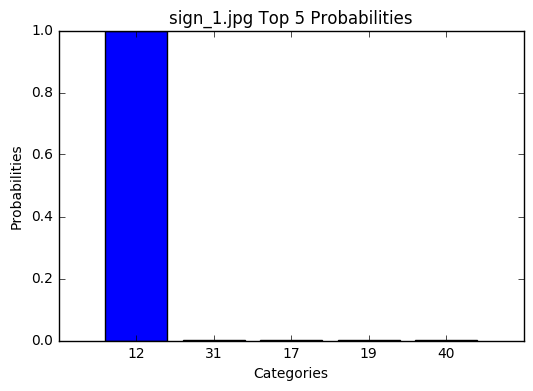

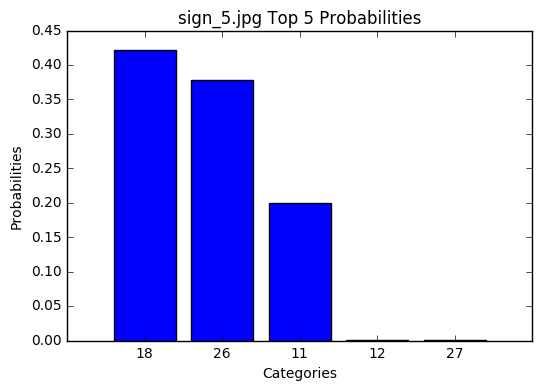

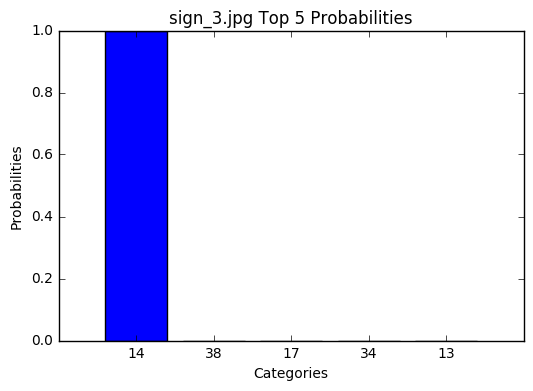

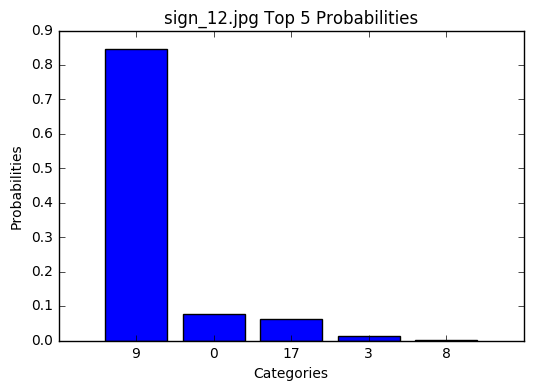

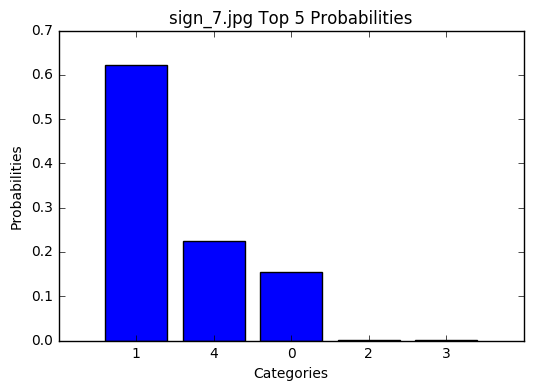

In [111]:
# convert the image to grey and normalize
signsForPredict = [1,2,4,6,5]
for i in signsForPredict:
    currentImage = newSigns[i]
    image = cv2.imread("./newSigns/"+currentImage)
    resizeImg = cv2.resize(image,(32,32),interpolation = cv2.INTER_AREA)
    resizeImg = resizeImg.astype(np.float32, copy=False)
    normalGrey = normalizeGrey(grayScaleConvert(resizeImg))
    normalGrey = np.reshape(normalGrey,(32,32,1))
    soft =generateSoftmax(normalGrey)
    plt.bar(range(len(soft[0][0])), soft[0][0], align='center')
    plt.xticks(range(len(soft[1][0])), soft[1][0])
    plt.title(newSigns[i]+" Top 5 Probabilities")
    plt.ylabel('Probabilities')
    plt.xlabel('Categories')
    plt.show()


### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

**Answer:**

For the 5 images above, the model is certain of each prediction it makes. The multiple sign image produces the least certain results, but this is expected. When evaluating other signs, it does introduce some uncertainty when encountering signs that are similar to but not exactly the same as signs that were used to train the models. Most of the signs that were tested in this group include some challenges that include signs that were not in the training set. In these cases, the other recommended classes do not always help. However, in some cases, the combination of classes make sense as a category for the sign. 

The only case where this is not true is the first poorly sized and postioned EU speed sign. The model performs very poorly on this particular sign. None of the top 5 returned results contain a speed limit sign as a classification.

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.